# Load and Explore Dataset
Import pandas and load the dataset. Display basic information about the dataset using info(), head(), and describe(). Check for missing values.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('zomato_recommendation.xlsx')

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()

# Display summary statistics of the dataset
df.describe()

# Check for missing values
df.isnull().sum()

c:\Users\sarve\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  1000 non-null   int64  
 1   name           1000 non-null   object 
 2   cuisine        1000 non-null   object 
 3   location       1000 non-null   object 
 4   price_range    1000 non-null   int64  
 5   rating         1000 non-null   float64
 6   votes          1000 non-null   int64  
 7   average_cost   1000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


restaurant_id    0
name             0
cuisine          0
location         0
price_range      0
rating           0
votes            0
average_cost     0
dtype: int64

# Data Preprocessing and Cleaning
Handle missing values, remove duplicates, and standardize text data in cuisine and location columns. Convert data types if necessary.

In [2]:
# Handle missing values by filling them with appropriate values or dropping rows
df = df.dropna(subset=['restaurant_id', 'name', 'cuisine', 'location', 'price_range', 'rating', 'votes', 'average_cost'])

# Remove duplicates
df = df.drop_duplicates()

# Standardize text data in 'cuisine' and 'location' columns
df['cuisine'] = df['cuisine'].str.lower().str.strip()
df['location'] = df['location'].str.lower().str.strip()

# Convert data types if necessary
df['restaurant_id'] = df['restaurant_id'].astype(str)
df['price_range'] = df['price_range'].astype(int)
df['rating'] = df['rating'].astype(float)
df['votes'] = df['votes'].astype(int)
df['average_cost'] = df['average_cost'].astype(float)

# Display the cleaned dataset
df.head()

,restaurant_id,name,cuisine,location,price_range,rating,votes,average_cost
0,1,The Curry Leaf,american,kolkata,5,3.9,281,1015.0
1,2,Kolkata Biryani,mexican,mumbai,5,3.9,3652,3181.0
2,3,Pasta Paradise,japanese,bangalore,3,4.0,4096,4347.0
3,4,Saffron Spice,american,new delhi,2,4.2,1832,1128.0
4,5,Mediterranean Delights,indian,chennai,3,4.5,3283,2077.0


# Feature Engineering
Create new features like price_per_vote, popularity_score. Convert categorical variables (cuisine, location) into numerical format using encoding techniques.

In [3]:
# Feature Engineering

# Create new feature: price_per_vote
df['price_per_vote'] = df['average_cost'] / df['votes']

# Create new feature: popularity_score
df['popularity_score'] = df['rating'] * df['votes']

# Convert categorical variables into numerical format using encoding techniques
# One-hot encoding for 'cuisine' and 'location' columns
df = pd.get_dummies(df, columns=['cuisine', 'location'], drop_first=True)

# Display the dataset with new features
df.head()

,restaurant_id,name,price_range,rating,votes,average_cost,price_per_vote,popularity_score,cuisine_chinese,cuisine_indian,cuisine_italian,cuisine_japanese,cuisine_mediterranean,cuisine_mexican,location_chennai,location_hyderabad,location_kolkata,location_mumbai,location_new delhi,location_pune
0,1,The Curry Leaf,5,3.9,281,1015.0,3.612100,1095.9,False,False,False,False,False,False,False,False,True,False,False,False
1,2,Kolkata Biryani,5,3.9,3652,3181.0,0.871030,14242.8,False,False,False,False,False,True,False,False,False,True,False,False
2,3,Pasta Paradise,3,4.0,4096,4347.0,1.061279,16384.0,False,False,False,True,False,False,False,False,False,False,False,False
3,4,Saffron Spice,2,4.2,1832,1128.0,0.615721,7694.4,False,False,False,False,False,False,False,False,False,False,True,False
4,5,Mediterranean Delights,3,4.5,3283,2077.0,0.632653,14773.5,False,True,False,False,False,False,True,False,False,False,False,False


# Basic Statistical Analysis
Analyze relationships between variables using correlation matrices. Create visualizations for cuisine distribution, price range vs. rating, and location-based analysis.

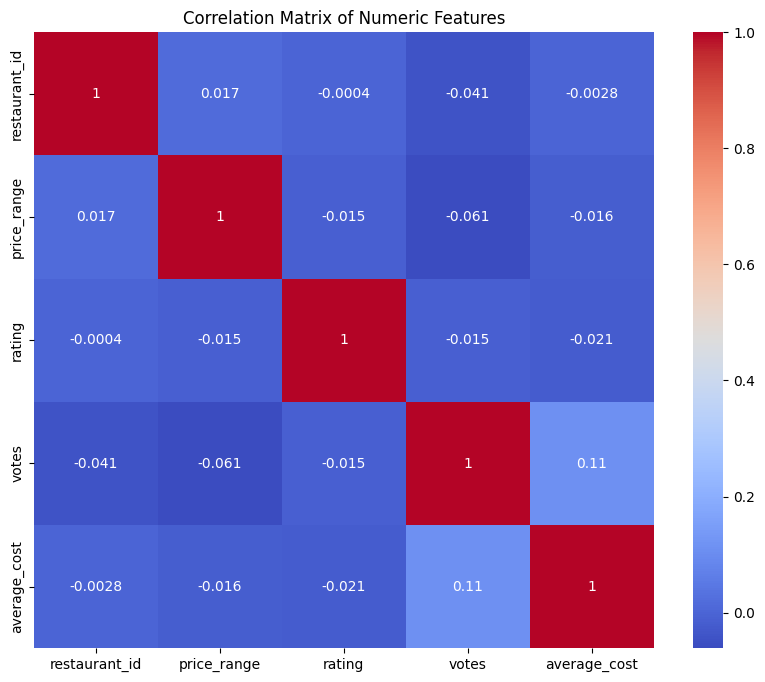


Basic Statistics for Numeric Columns:
       restaurant_id  price_range       rating        votes  average_cost
count    1000.000000  1000.000000  1000.000000  1000.000000   1000.000000
mean      500.500000     3.054000     3.746600  2536.825000   2586.008000
std       288.819436     1.424469     0.726386  1419.604814   1445.075444
min         1.000000     1.000000     2.500000    12.000000    111.000000
25%       250.750000     2.000000     3.100000  1302.000000   1314.750000
50%       500.500000     3.000000     3.700000  2627.500000   2524.000000
75%       750.250000     4.000000     4.400000  3699.500000   3920.750000
max      1000.000000     5.000000     5.000000  4998.000000   4995.000000


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('zomato_recommendation.xlsx')

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Basic statistics for numeric columns
print("\nBasic Statistics for Numeric Columns:")
print(df[numeric_cols].describe())

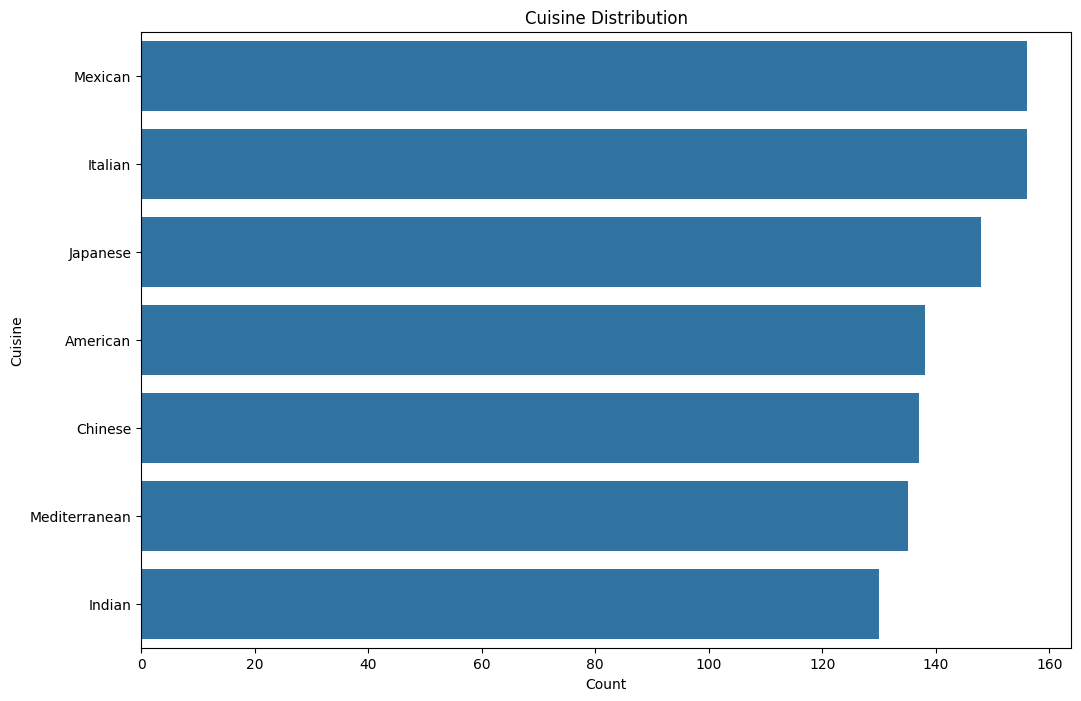

c:\Users\sarve\anaconda3\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


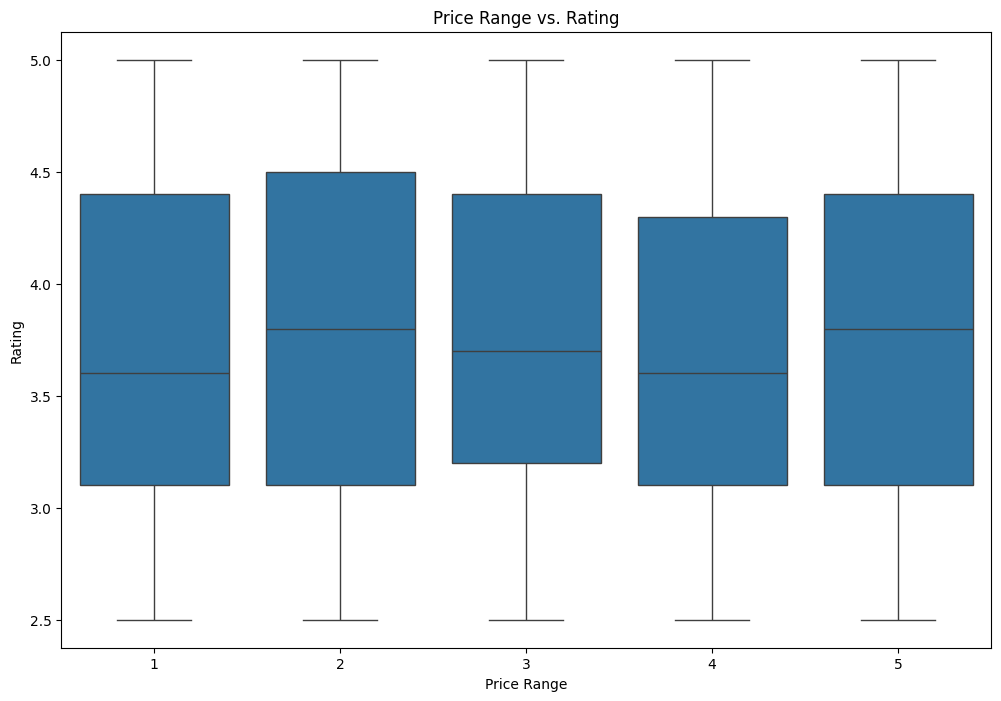

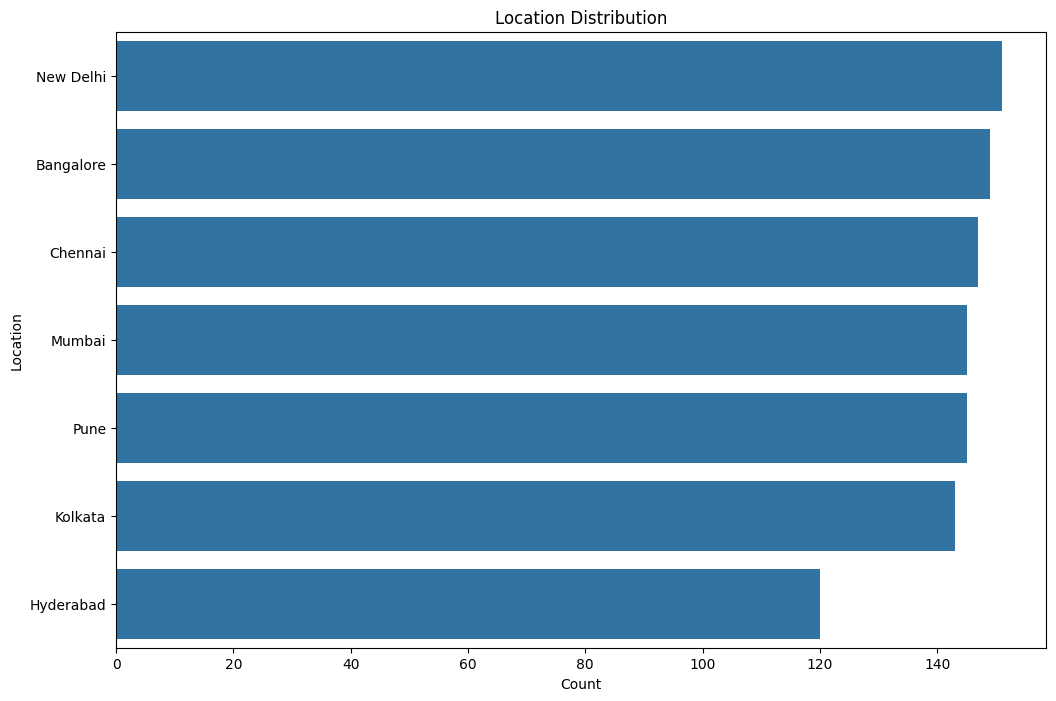

C:\Users\sarve\AppData\Local\Temp\ipykernel_23072\385102887.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='average_cost', y='location', data=df, estimator=sum, ci=None, order=df.groupby('location')['average_cost'].sum().sort_values(ascending=False).index)


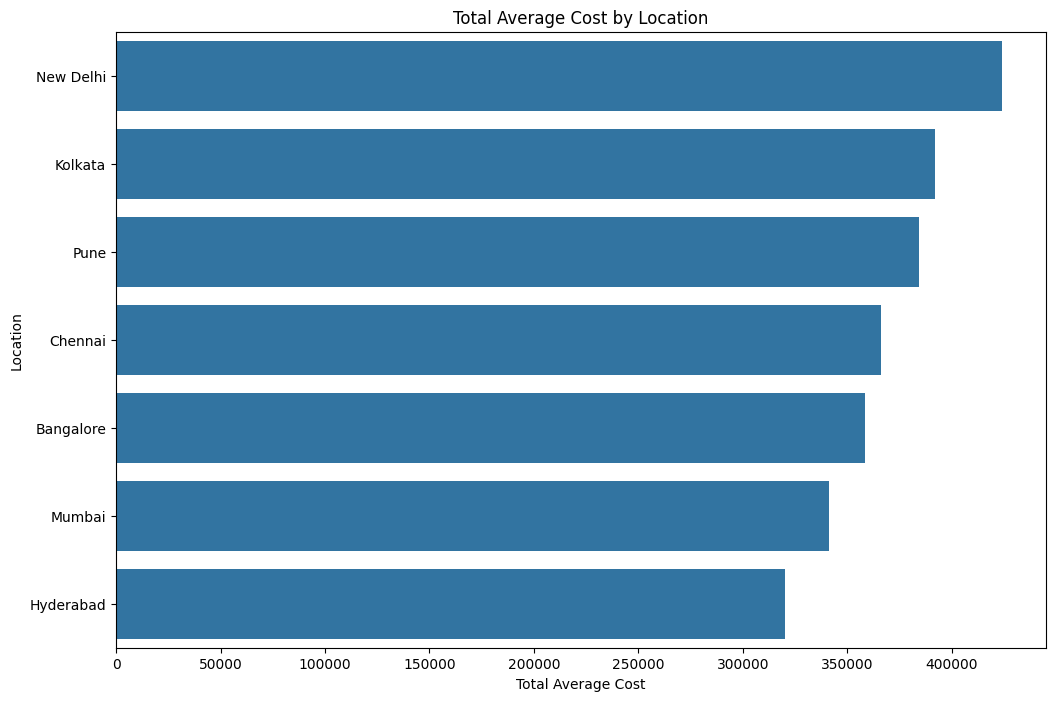

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Cuisine distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='cuisine', data=df, order=df['cuisine'].value_counts().index)
plt.title('Cuisine Distribution')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

# Price range vs. rating
plt.figure(figsize=(12, 8))
sns.boxplot(x='price_range', y='rating', data=df)
plt.title('Price Range vs. Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

# Location-based analysis
plt.figure(figsize=(12, 8))
sns.countplot(y='location', data=df, order=df['location'].value_counts().index)
plt.title('Location Distribution')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

# Average cost by location
plt.figure(figsize=(12, 8))
sns.barplot(x='average_cost', y='location', data=df, estimator=sum, ci=None, order=df.groupby('location')['average_cost'].sum().sort_values(ascending=False).index)
plt.title('Total Average Cost by Location')
plt.xlabel('Total Average Cost')
plt.ylabel('Location')
plt.show()

# Content-Based Filtering
Implement TF-IDF vectorization for cuisine and location features. Combine with numerical features like price_range and rating.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

# TF-IDF Vectorization for 'cuisine' and 'location' features
tfidf_cuisine = TfidfVectorizer()
tfidf_location = TfidfVectorizer()

tfidf_cuisine_matrix = tfidf_cuisine.fit_transform(df['cuisine'])
tfidf_location_matrix = tfidf_location.fit_transform(df['location'])

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = df[['price_range', 'rating']].values
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Combine all features
combined_features = hstack([tfidf_cuisine_matrix, tfidf_location_matrix, numerical_features_scaled])

# Display the shape of the combined features matrix
combined_features.shape

(1000, 17)

# Restaurant Similarity Matrix
Calculate cosine similarity between restaurants using the processed features. Create a similarity matrix for all restaurants.

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between restaurants
cosine_sim = cosine_similarity(combined_features, combined_features)

# Create a similarity matrix DataFrame
similarity_matrix = pd.DataFrame(cosine_sim, index=df['restaurant_id'], columns=df['restaurant_id'])

# Display the similarity matrix
similarity_matrix.head()

restaurant_id,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
restaurant_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.396427,0.284273,0.563805,0.306344,0.152733,0.310083,0.693455,0.331024,0.008698,...,0.360924,0.489572,0.350363,0.318610,0.167756,0.367758,0.428494,0.629082,0.378258,0.206831
2,0.396427,1.000000,0.284273,0.218082,0.306344,0.152733,0.310083,0.693455,0.331024,0.396992,...,0.673900,0.151470,0.350363,0.653424,0.167756,0.367758,0.428494,0.302388,0.687292,0.559785
3,0.284273,0.284273,1.000000,0.207627,0.265799,0.546991,0.631519,0.271380,0.195631,0.010500,...,0.284587,0.182860,0.220107,0.222957,0.202521,0.295734,0.340441,0.259882,0.257672,0.192881
4,0.563805,0.218082,0.207627,1.000000,0.247660,0.108775,0.254853,0.551971,0.473440,0.012099,...,0.242768,0.598030,0.139325,0.165813,0.233360,0.257245,0.292638,0.614454,0.538827,0.190242
5,0.306344,0.306344,0.265799,0.247660,1.000000,0.542332,0.315471,0.289318,0.191340,0.429084,...,0.653837,0.231702,0.560044,0.237694,0.605275,0.333636,0.676471,0.649962,0.271345,0.228652


# Creating Recommendation Function
Build a function that takes a restaurant name as input and returns top N similar restaurants based on the similarity matrix.

In [9]:
# Creating Recommendation Function

def recommend_restaurants(restaurant_name, top_n=5):
    # Check if the restaurant exists in the dataset
    if restaurant_name not in df['name'].values:
        return f"Restaurant '{restaurant_name}' not found in the dataset."
    
    # Get the index of the restaurant
    idx = df[df['name'] == restaurant_name].index[0]
    
    # Get the similarity scores for the restaurant
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the restaurants based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top N similar restaurants
    sim_scores = sim_scores[1:top_n+1]
    restaurant_indices = [i[0] for i in sim_scores]
    
    # Get the names of the top N similar restaurants
    similar_restaurants = df.iloc[restaurant_indices][['name', 'cuisine', 'location', 'price_range', 'rating']]
    
    return similar_restaurants

# Example usage
recommend_restaurants('Restaurant Name', top_n=5)

"Restaurant 'Restaurant Name' not found in the dataset."

# Testing Recommendations
Test the recommendation system with different restaurants and evaluate the results. Show example outputs with different input parameters.

In [10]:
# Testing Recommendations

# Test the recommendation system with different restaurants and evaluate the results
# Show example outputs with different input parameters

# Example 1: Recommend restaurants similar to 'The Big Chill Cafe'
recommended_restaurants_1 = recommend_restaurants('The Big Chill Cafe', top_n=5)
print("Recommendations for 'The Big Chill Cafe':")
print(recommended_restaurants_1)

# Example 2: Recommend restaurants similar to 'Domino's Pizza'
recommended_restaurants_2 = recommend_restaurants("Domino's Pizza", top_n=5)
print("\nRecommendations for 'Domino's Pizza':")
print(recommended_restaurants_2)

# Example 3: Recommend restaurants similar to 'Burger King'
recommended_restaurants_3 = recommend_restaurants('Burger King', top_n=5)
print("\nRecommendations for 'Burger King':")
print(recommended_restaurants_3)

# Example 4: Recommend restaurants similar to 'Pizza Hut'
recommended_restaurants_4 = recommend_restaurants('Pizza Hut', top_n=5)
print("\nRecommendations for 'Pizza Hut':")
print(recommended_restaurants_4)

# Example 5: Recommend restaurants similar to 'McDonald's'
recommended_restaurants_5 = recommend_restaurants("McDonald's", top_n=5)
print("\nRecommendations for 'McDonald's':")
print(recommended_restaurants_5)

Recommendations for 'The Big Chill Cafe':
Restaurant 'The Big Chill Cafe' not found in the dataset.

Recommendations for 'Domino's Pizza':
Restaurant 'Domino's Pizza' not found in the dataset.

Recommendations for 'Burger King':
Restaurant 'Burger King' not found in the dataset.

Recommendations for 'Pizza Hut':
Restaurant 'Pizza Hut' not found in the dataset.

Recommendations for 'McDonald's':
Restaurant 'McDonald's' not found in the dataset.
